# **Projeto de Estatística II - LM Data Talents (ADA & Leroy Merlin)**

## **Grupo 2:** 
- Abelar Henrique Dias Vaz
- Christyan Costa de Oliveira
- Cristiane Del Barco Nunes
- Danilo Nozima
- Luis Ernesto Beingolea

# **Introdução** 

<font color = red>

- Descrever a base de dados:
Os dados são tomados do centro clínico da universidade de Wisconsin sobre diagnóstico de câncer de mama. As características foram calculadas de uma imagem digitalizada de uma amostra retirada de material citológico para análise patológica por punção aspirativa por agulha fina (PAAF) de um nódulo de mama. Descrevem características do núcleo celular presentes na imagem no microscópio.
Os autores da pesquisa são W.N. Street, W.H. Wolberg and O.L. Mangasarian, a qual foi publicada com o nome: "***Nuclear feature extraction for breast tumor diagnosis***" em 1993 no IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

Informação de atributos:¶

    id
    diagnosis: diagnóstico tumoral (M = maligno, B = benigno)

Columnas 3 a 32

Dez características con valores reais foram calculadas para cada núcleo celular:

    radius: distâncias desde o centro até os pontos sobre o perímetro
    texture: desvios padrão de valores nas escalas de cinza
    perimeter: perímetro celular
    area: área celular
    smoothness: variação local nos comprimentos do rádio
    compactness: perímetro^2 / area - 1.0
    concavity: severidade de porções côncavas do contorno
    concave points: número de porções côncavas portions do contorno
    symmetry: simetria
    fractal dimension: "aproximação da linha de costa" - 1

As médias, erro padrão, e a "pior" ou a maior (média dos maiores três valores) das características foram calculadas para cada, resultando em 30 features. Assim, o campo 3 do CSV é o Rádio Médio, campo 13 é EP Rádio, campo 23 é o Pior Rádio.

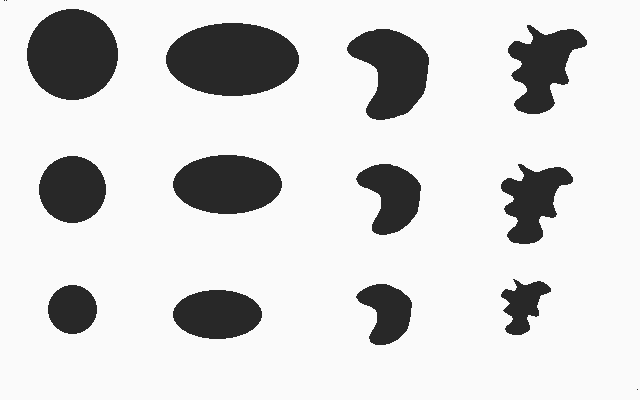


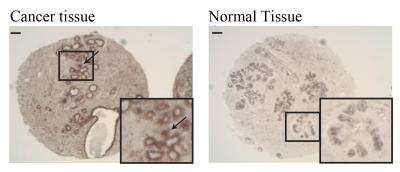

- Formular o problema que trataremos:
O objetivo é construir um modelo de regressão que permita com as features determinar se uma amostra celular vem de um tumor maligno

In [113]:
# Exploração dos dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
            confusion_matrix, classification_report, roc_curve, roc_auc_score

## Carregando os dados  

In [93]:
df = pd.read_csv("breast_cancer_wisconsin_dataset.csv", index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 32)

# **Propriedades gerais dos dados e primeiros insights**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [94]:
# Removing column "Unnamed: 32"
df = df.drop("Unnamed: 32", axis = 1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

## Distribuição da variável alvo ('diagnosis')

Casos de tumor benigno: 357 (62.74%)
Casos de tumor maligno: 212 (37.26%)


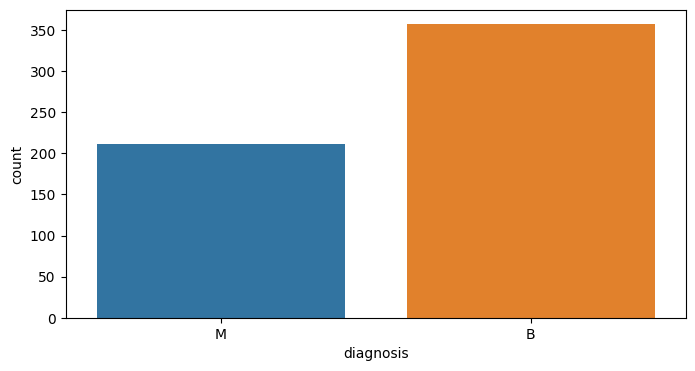

In [95]:
plt.figure(figsize=(8,4))
alvo = 'diagnosis'
sns.countplot(data = df, x = alvo)

benigno, maligno = df[alvo].value_counts()
benigno_pct = (benigno/df.shape[0])*100
maligno_pct = (maligno/df.shape[0])*100

print(f"Casos de tumor benigno: {benigno} ({benigno_pct:.2f}%)")
print(f"Casos de tumor maligno: {maligno} ({maligno_pct:.2f}%)")

## Um primeiro olhar sobre as correlações

-  A fim de obter uma interpretabilidade simples e intuitiva,
 vamos considerar somente as variáveis explanatórias médias ("mean")
 em uma primeira abordagem.
- Mais adiante, levaremos em conta mais variáveis explanatórias
("features") e analisaremos o impacto sobre nosso modelo.

In [96]:
cols_mean = [
        alvo,
        "radius_mean",
        "texture_mean",
        "perimeter_mean",
        "area_mean",
        "smoothness_mean",
        "compactness_mean",
        "concavity_mean",
        "concave points_mean",
        "symmetry_mean",
        "fractal_dimension_mean"
       ]
df_mean = df[cols_mean].copy()

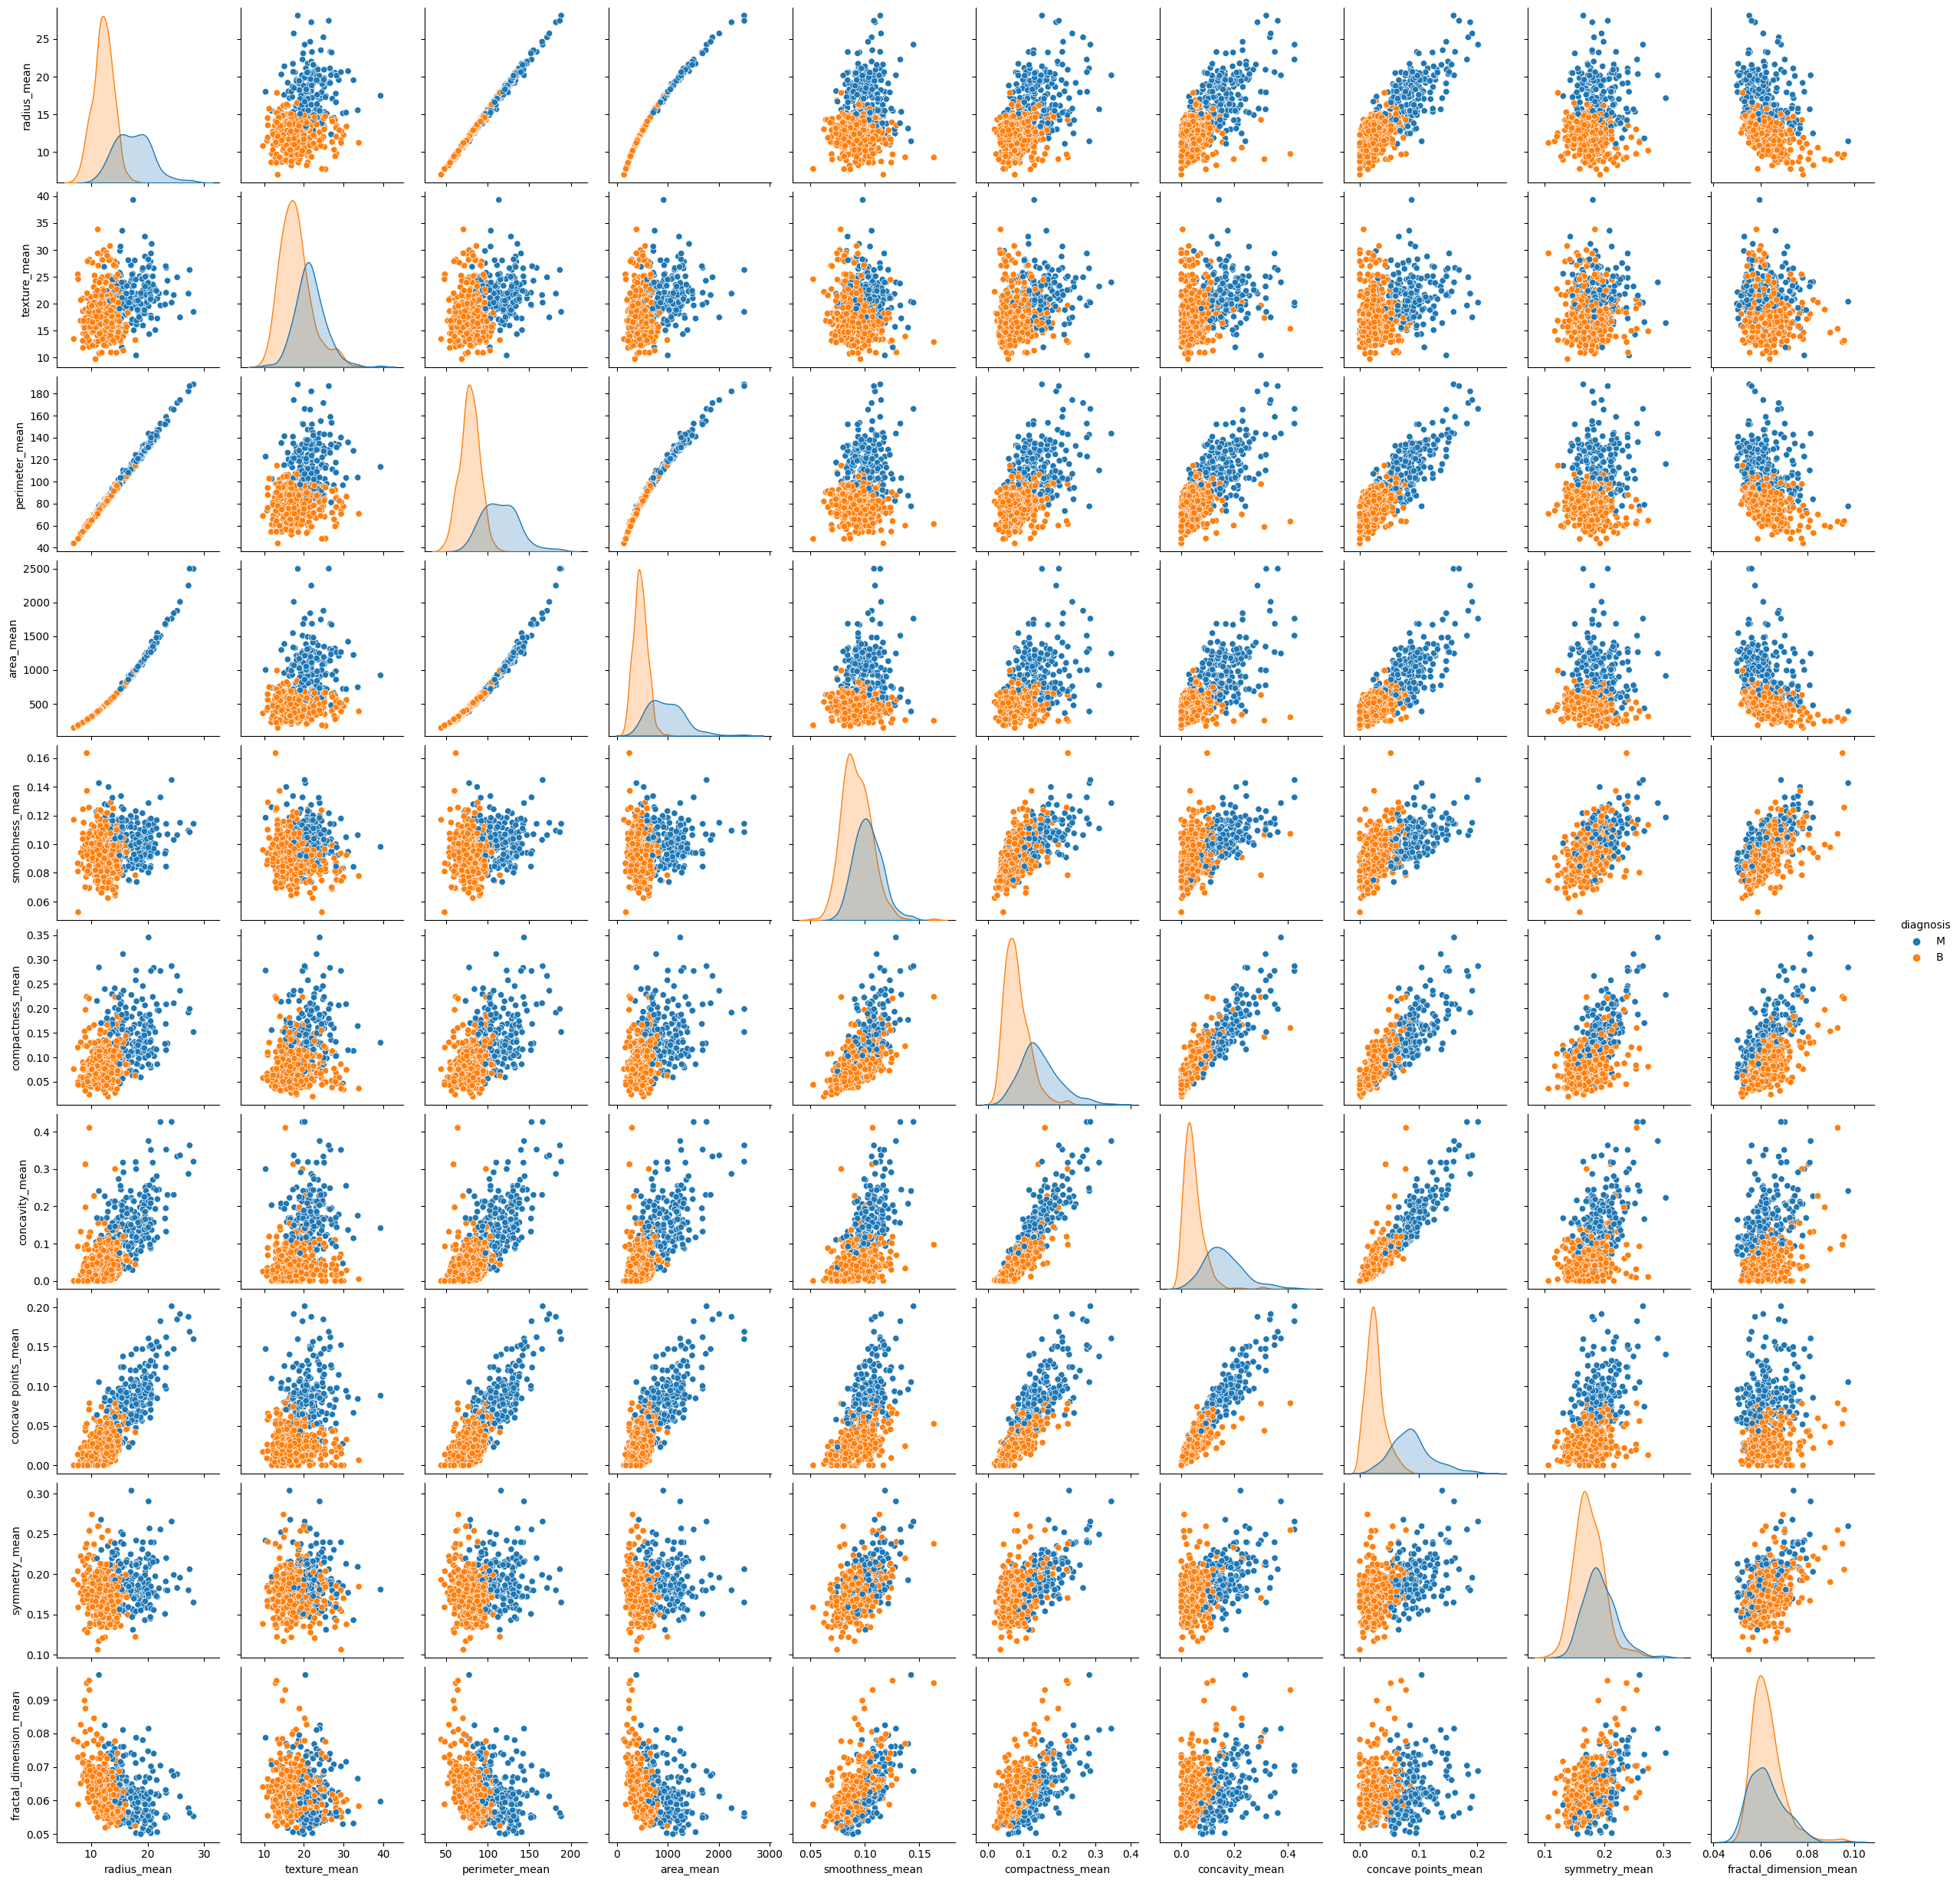

In [8]:
sns.pairplot(data = df_mean, hue = alvo)

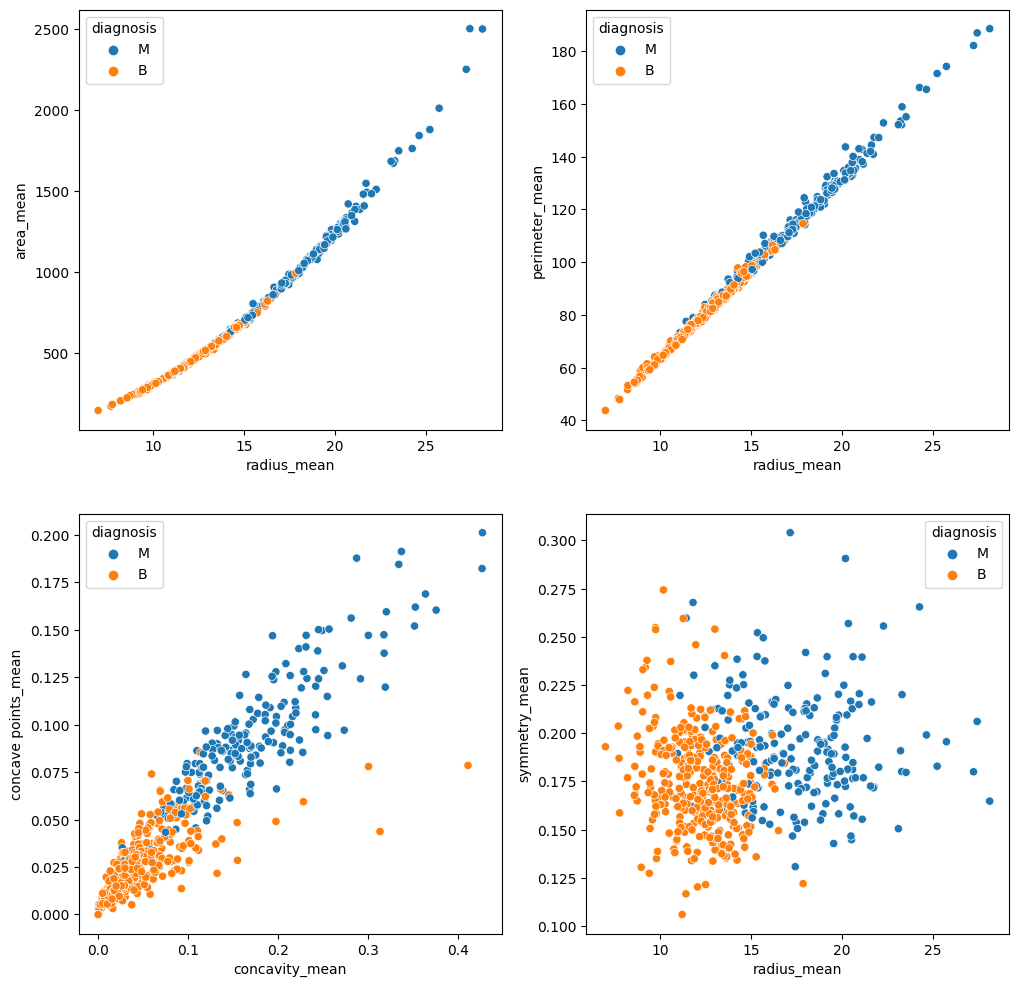

In [37]:
fig = plt.figure(figsize=(12,12))
plt.subplot(221)
sns.scatterplot(data=df_mean, x="radius_mean", y="area_mean", hue=alvo)
plt.subplot(222)
sns.scatterplot(data=df_mean, x="radius_mean", y="perimeter_mean", hue=alvo)
plt.subplot(223)
sns.scatterplot(data=df_mean, x="concavity_mean", y="concave points_mean", hue=alvo)
plt.subplot(224)
sns.scatterplot(data=df_mean, x="radius_mean", y="symmetry_mean", hue=alvo)

plt.show()

<font color=red>
    
- Descrever comportamento dos gráficos acima e extrair primeiros insights.
- Acrescentar mais insights.

## Analisando correlações com a variável alvo

In [97]:
# Trocando os rótulos de classe 'B' (benigno) e 'M' (maligno) por valores numéricos  
df_mean[alvo]=(df_mean[alvo] =='M').astype(int)
#df_mean[alvo].replace(to_replace = dict(B = 0, M = 1), inplace = True)
df_mean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [98]:
correlacoes_alvo = df_mean.corr()
correlacoes_alvo[alvo].sort_values(ascending=False)

diagnosis                 1.000000
concave points_mean       0.776614
perimeter_mean            0.742636
radius_mean               0.730029
area_mean                 0.708984
concavity_mean            0.696360
compactness_mean          0.596534
texture_mean              0.415185
smoothness_mean           0.358560
symmetry_mean             0.330499
fractal_dimension_mean   -0.012838
Name: diagnosis, dtype: float64

## Analisando correlações entre as variáveis explanatórias

In [99]:
# Analyzing correlations among explanatory variables
df_mean_explan = df_mean.copy()
df_mean_explan = df_mean_explan.drop([alvo], axis = 'columns')

df_mean_explan.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [100]:
correlacoes_explan = df_mean_explan.corr()
correlacoes_explan

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


<Axes: >

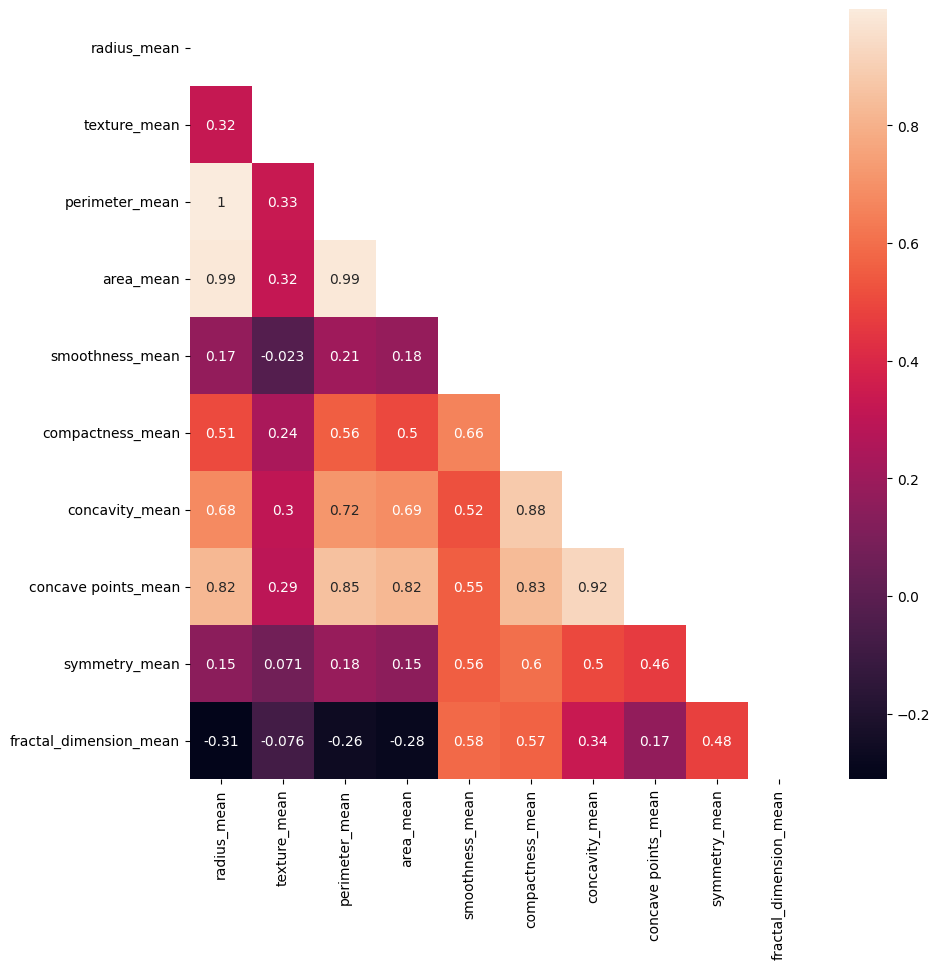

In [50]:
# Máscara para o triângulo superior
masc_triang_sup = np.zeros_like(correlacoes_explan, dtype=bool)
masc_triang_sup[np.triu_indices_from(masc_triang_sup)] = True

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data = correlacoes_explan, annot=True, mask=masc_triang_sup)

<font color = red>

- <b>Escrever uma justificativa para escolhermos as variáveis abaixo (argumentar sobre as correções)</b>
Uma análise sobre a matriz de correlação nos indica que as variáveis perímetro e área (perimeter_mean & area_mean) podem ser explicadas pelo rádio da célula. Similarmente, os pontos de concavidade podem ser explicados pela concavidade

In [101]:
chosen_features = [
                    'radius_mean',
                    'texture_mean',
                    'smoothness_mean',
                    'concavity_mean',
                    'compactness_mean',
                    'symmetry_mean',
                    'fractal_dimension_mean'
]

In [102]:
df_prep = df_mean[[alvo] + chosen_features].copy()
#df_prep['diagnosis'] = df_mean['diagnosis']
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   concavity_mean          569 non-null    float64
 5   compactness_mean        569 non-null    float64
 6   symmetry_mean           569 non-null    float64
 7   fractal_dimension_mean  569 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 40.0 KB


In [103]:
correlacoes_prep = df_prep.corr()

<Axes: >

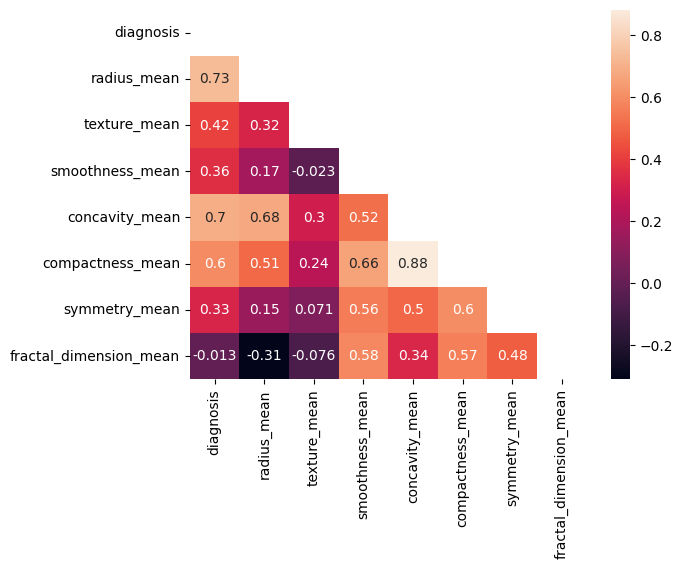

In [59]:
#correlations_explanatory = df_mean_explanatory.corr()
masc_triang_sup_prep = np.zeros_like(correlacoes_prep, dtype=bool)
masc_triang_sup_prep[np.triu_indices_from(masc_triang_sup_prep)] = True

sns.heatmap(correlacoes_prep, annot = True, mask=masc_triang_sup_prep)

# **Modelagem**

## Primeira abordagem

### Construção do modelo 

#### Separação dos dados

In [104]:
# Selecionando as colunas com variáveis explanatórias (features)
cols = df_prep.drop(columns=alvo).columns

# Separando os dados em grupos de treino e de teste 
X = df_prep[cols]
y = df_prep[alvo]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Treinamento

In [105]:
# Rearranjando X antes de fazer o fitting
X_train_array = np.array(X_train).reshape(-1, X.shape[1]) 
logistic_reg = LogisticRegression()
model = logistic_reg.fit(X_train_array, y_train)

#### Teste

In [106]:
# Rearranjando X_test
X_test_array = np.array(X_test).reshape(-1,X.shape[1])

# Fazendo previsões para classificação das 2 classes (0 e 1) usando os dados para teste
y_pred = model.predict(X_test_array) 

### Avaliação do modelo (métricas)

#### Matriz de confusão

Matriz de Confusão: 
 



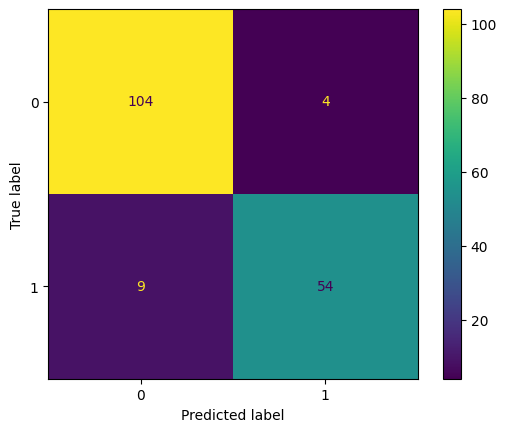

              precision    recall  f1-score   support

           0      0.920     0.963     0.941       108
           1      0.931     0.857     0.893        63

    accuracy                          0.924       171
   macro avg      0.926     0.910     0.917       171
weighted avg      0.924     0.924     0.923       171

Verdadeiro negativo: 104
Falso positivo: 4
Falso negativo: 9
Verdadeiro positivo: 54
--------------------------------
Acurácia: 0.924
Precisão: 0.931
Recall: 0.857


In [110]:
matriz_conf = confusion_matrix(y_test, y_pred)

verdadeiro_negativo = matriz_conf[0][0]
falso_positivo = matriz_conf[0][1]
falso_negativo = matriz_conf[1][0]
verdadeiro_positivo = matriz_conf[1][1]

print('Matriz de Confusão: \n', '\n')
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred, digits=3))
print('Verdadeiro negativo:', verdadeiro_negativo)
print('Falso positivo:', falso_positivo)
print('Falso negativo:', falso_negativo)
print('Verdadeiro positivo:', verdadeiro_positivo)

print('-'*32)

print("Acurácia:", round(accuracy_score(y_test, model.predict(X_test_array)), 3))
print("Precisão:", round(precision_score(y_test, model.predict(X_test_array)),3))
print("Recall:", round(recall_score(y_test, model.predict(X_test_array)),3))

#### Curva ROC

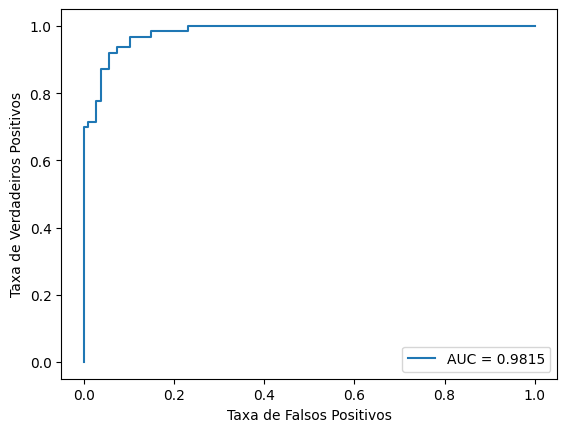

In [112]:
#A matriz de probabilidades onde cada linha tem as probabilidades
#do valor estimado a partir do X_test_array ser 0 e ser 1
y_pred_prob = logistic_reg.predict_proba(X_test_array)

# Para fazer a área por baixo da curva, os parámetros da função  são
# os y de teste e as probabilidades de a regressao aplicada
# ao X_test retorne 1

probab_y_pred_ser_1 = y_pred_prob[:,1]

taxa_falsos_positivos, taxa_verdadeiros_positivos, _ = roc_curve(y_test,  probab_y_pred_ser_1)

auc = roc_auc_score(y_test, probab_y_pred_ser_1)


plt.plot(taxa_falsos_positivos,taxa_verdadeiros_positivos, label = "AUC = " + str(round(auc,4)))
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.legend(loc=4)
plt.show()

## Refinando o modelo - Parte 1

Acrescentando variáveis explanatórias com erro padrão ("SE - standard error")

### Construção 

<font color = red>

- Acrescentar as colunas com erro padrão
```
colunas_novas = [
                    'radius_se',
                    'texture_se',
                    'smoothness_se',
                    'compactness_se',
                    'symmetry_se',
                    'fractal_dimension_se'
]
```
    
- Executar os outros passos da construção e avaliação do modelo

#### Separação dos dados

#### Treinamento

#### Teste

### Avaliação (métricas)

#### Matriz de confusão

#### Curva ROC

## Refinando o modelo - Parte 2

Acrescentando variáveis explanatórias com média dos piores ("worst")

### Construção 

#### Separação dos dados

#### Treinamento

#### Teste

### Avaliação (métricas)

#### Matriz de confusão

#### Curva ROC

# **Conclusões**

<font color = red>

- Escrever conclusões